# 2.2.3 Inducción de reglas con el algoritmo Apriori

Una de las aplicaciones directas del concepto de probabilidad como frecuencia es la construcción de sistemas de recomendación basados en que ítems siempre van juntos. Este tipo de sistema de recomendación es diferente de aquellos que buscan clientes con comportamientos similares para realizar la recomendación de productos. En términos más generales, este tipo de sistemas permite obtener los conjuntos de ítems que los clientes suelen seleccionar. En este tutorial se discute el algoritmo Apriori para la construcción de reglas de asociación entre ítems.

### Descripción del problema

Un problema típico de los retailers es poder recomendar productos afines a sus compradores basados en el histórico general de las ventas. Estas recomendaciones tienen como fin sugerirle al usuario productos que podría haber olvidado y que usualmente se llevan juntos, o nuevos productos sustitutos que reemplazarían productos ya posicionados. Esta recomendación se basa en el histórico general de la tienda (productos que todas las personas usualmente llevan juntos) y no en las preferencias individuales de los clientes.

Para ejemplificar el proceso de construcción de las reglas de inducción, se tiene un conjunto ficticio de 10 transacciones realizadas sobre seis posibles ítems (x1,...,x6), donde cada fila representa una transacción:

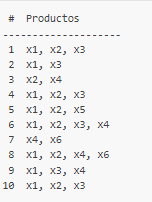

El problema consiste en derivar un conjunto de reglas de asociación que permita recomenda un grupo de productos a partir de los productos que ya seleccionó el cliente. Por ejemplo, si un cliente compra $x_1$ y $x_3$, ¿qué producto o productos se le deben recomendar?

### Transacción

Una transacción se representa a través del conjunto de ítems comprados en ella. Así, una transacción con cuatro ítems se representa como:
    
$${x_1,x_2,x_3,x_4}$$

El problema descrito equivale a determinar los productos $x_i$, con $x_i ∉ {x_1,x_2,x_3,x_4}$, con mayor probabilidad de ser comprados sabiendo que el cliente ya seleccionó $x_1, x_2, x_3$ y $x_4$. Dicho de otra forma, se deben computar las probabilidades condicionales $Pr(x_i|x_1,x_2,x_3,x_4)$ y recomendar los N productos xi con mayor probabilidad condicional de compra. En este problema se asume que SI existe una dependencia entre la compra de un producto y otro; si esta dependencia no existe, no tiene sentido construir el sistema de recomendación.

### Regla de asociación

De esta forma, el objetivo del sistema de recomendación es construir una regla de asociación de la forma:

$$ {x_2,x_3,x_4}→x_1 $$

la cual indica que cuando se compran $x_2, x_3$ y $x_4$ también se compra (implica) $x_1$.

Es posible evaluar todas las posibles reglas por fuerza bruta (enumeración). Para el caso anterior, las reglas podrían ser: 

{x2}→x1, {x3}→x1, {x4}→x1, {x1}→x2, {x3}→x2, …, {x2,x3}→x1, ..., {x1,x2}→x4

y así sucesivamente, hasta construir todas las permutaciones posibles. Sin embargo, esta solución resulta imposible en términos prácticos debido a que la cantidad de reglas crece exponencialmente.

### Algoritmo Apriori

El algoritmo Apriori se basa en evaluar solamente las reglas que tienen una frecuencia alta (mayor probabilidad). El algoritmo se basa en la siguiente heurística: para que el conjunto $\{x_1,x_2\}$ sea frecuente (que tenga una probabilidad alta), los ítems $x_1$ y $x_2$ deben ser frecuentes; es decir, si $x_1$ o $x_2$ son infrecuentes, su combinación no es evaluada.

Para medir la importancia de una regla se usa el soporte y la confianza. Si una regla de asocación se escribe como

$$X→Y$$

el soporte es la proporción de veces que $X$ aparece respecto al total de transacciones; nótese que acá se está hablando explícitamente de probabilidad.

La confianza se define como:

$$ confidence(X→Y)=\frac{support(X,Y)}{support(X)} $$

la cual se interpreta como la cantidad de veces en que la presencia de $X$ resulta en la presencia de $Y$. Es decir, ya que se dio $X$ que tan probable es que se de $Y$.

El algoritmo Apriori opera en dos fases: En la primera fase se identifican todos los conjuntos de ítems que cumplen con el soporte mínimo requerido (o probabilidad mínima de compra). En la segunda fase, con los ítems identificados en la fase uno, se crean reglas que cumplen con la confianza mínima requerida.

En la primera fase, se procede de forma constructiva de la siguiente forma (explícitamente se está calculado probabilidad):

- Se calcula el soporte de cada ítem y se seleccionan aquellos ítems que cumplen con el soporte mínimo requerido.

- Se forman todos las conjuntos (combinaciones) de dos ítems. Sólo se consideran combinaciones de dos ítems que contengan ítems que cumplen el soporte mínimo requerido. Se seleccionan aquellas combinaciones de dos ítems que cumplen con el soporte mínimo requerido.

- Se forman todos los conjuntos de tres ítems. No se consideran combinaciones que contengan conjuntos no frecuentes de dos ítems. Es decir, si la combinación $\{x_1, x_4\}$ no se frecuente (no cumple con el soporte mínimo requerido), entonces no se consideran combinaciones como $\{x_1, x_3, x_4\}$ o $\{x_1, x_2, x_4\}.

- Se continua con las combinaciones de cuatro ítems y se seleccionan aquellas que cumplan con el soporte mínimo requerido. El algoritmo se detiene cuando ya no hay combinaciones de ítems que cumpan con el soporte mínimo.

En la segunda fase, para todas las combinaciones de $2, 3, … ítems$, se generan todas las reglas posibles y se evalúa su confianza. Se seleccionan aquellas que cumplen con la confianza mínima requerida. Si la combinación $\{x_1, x_2\}$ cumplio con el soporte mínimo, entonces se consideran las reglas $\{x_1\} → \{x_2\}$ y $\{x_2\} → \{x_1\}$. Nótese que es posible considerar reglas con varios elementos en el consecuente como por ejemplo $\{x_1\} → \{x_2, x_3\}$.

El lift de una regla mide la importancia de una regla en relación a la tasa típica de compra, dado que se sabe que un ítem o un conjunto de ítems han sido comprados.

$$ lift(X→Y)=\frac{confidence(X,Y)}{support(Y)} $$

In [1]:
print('Ok_')

Ok_
